## Observations and Insights 

### Notes on the Data
* One mouse in the study was entered twice with different tumor volumes across the timepoints.  To avoid contaminating the data and calculations that mouse, g989, was ignored in all analysis below.

### Observations
* Pie Chart (Gender Demographics):
    * There is approximately a 50/50 split in the genders of the test subjuect
* Statistics Table (Tumor Volume (mm3):
    * Ramicane, Capomulin, Ceftamin, Infubinol, respectively, had the smallest error, standard deviation, variance, and median values when looking at the Tumor Volume (mm3) data.  Note: Propriva moves into 3rd for mean 
* Bar Chart (number of mice across all timepoints of the entire study):
    * Ramicane and Capomulin more test subjects last longer in the study (highest bars)
    * Propriva had the fewest test subjects last in the study (lowest bar)
* Boxplots (4 most promising drugs, Tumor Wolume (mm3) data)
    * Ramicane & Capomulin had the most data at the lower values, Infubinol & Ceftamin were both significantly higher
    * Infubinol had one outlier that fell into the sames range as Ramicane & Capomulin
* Line Plot (one mouse in Capomulin regimen)
    * Tumor volume is decreasing over time
* Scatter Plot (average tumor volume vs. weight)
    * tumor volume and test subject weight have a positive correlation with r<sup>2</sup> $\small  \approx$ 71%
* Other (discovered during analysis process):
    * There are approximately 25 test subjects in each Drug Regimen trial
    
### Insights
* Propriva being in 3rd for mean can be ignored because many of Propriva's test subjects were removed from the study early (fewer Timepoints), thus affecting the mean.
* Ramicane & Capomulin are the best performing based on this study

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = os.path.join("data", "Mouse_metadata.csv")
study_results_path = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(combined_data_df)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_keep_both_df = combined_data_df.loc[combined_data_df.duplicated(['Mouse ID', 'Timepoint'], keep=False) == True]
duplicate_mice_keep_first_df = combined_data_df.loc[combined_data_df.duplicated(['Mouse ID', 'Timepoint'], keep='first') == True]
duplicate_mice_keep_last_df = combined_data_df.loc[combined_data_df.duplicated(['Mouse ID', 'Timepoint'], keep='last') == True]
duplicate_mice_keep_both_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False, ignore_index=True)

In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_data_df)

1883

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen
column_sort = {'Mean':'Mean',
               'Med':'Median',
               'Var':'Variance',
               'StdDev':'Standard Deviation',
               'Sem':'SEM'}
clean_grouped_df = clean_combined_data_df.groupby('Drug Regimen')
grouped_mean = clean_grouped_df.mean()
grouped_median = clean_grouped_df.median()
grouped_variance = clean_grouped_df.var()
grouped_stddev = clean_grouped_df.std()
grouped_sem = clean_grouped_df.sem()

# This method produces everything in a single groupby function.
summary_stats_df = pd.DataFrame({'Mean': grouped_mean['Tumor Volume (mm3)'],
                                 'Median': grouped_median['Tumor Volume (mm3)'],
                                 'Variance': grouped_variance['Tumor Volume (mm3)'],
                                 'Standard Deviation': grouped_stddev['Tumor Volume (mm3)'],
                                 'SEM': grouped_sem['Tumor Volume (mm3)']
                                })
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Sort Stats Table (Extra Stuff: just for fun)

In [7]:
# Allow user to sort statistics table by any one of the columns 
sort_col = input("Which column would you like to sort by? (Mean/Med/Var/StdDev/Sem): ")
sorted_summary = summary_stats_df.sort_values(column_sort[sort_col])
# sorted_summary = summary_stats_df.sort_values('SEM')
sorted_summary

Which column would you like to sort by? (Mean/Med/Var/StdDev/Sem): Sem


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

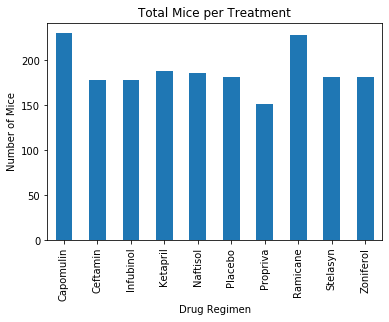

In [8]:
# Generate a bar plot showing the number of mice for each treatment 
# throughout the course of the study using pandas.

# get count by mouse ID
count_mice = clean_grouped_df['Mouse ID'].count()
#create bar chart
chart_mice = count_mice.plot.bar(x='Regimen',y='Mouse ID', title='Total Mice per Treatment')
plt.ylabel('Number of Mice')
chart_mice

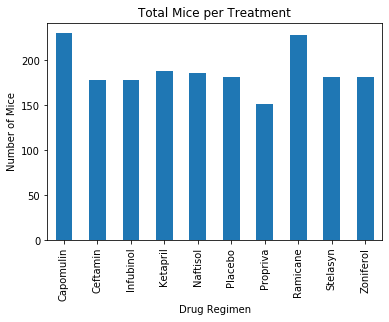

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# use same variables from previous cell to create bar chart with pyplot
chart_mice = count_mice.plot(kind = 'bar', title = 'Total Mice per Treatment')
# label x and y axis
chart_mice.set_xlabel('Drug Regimen')
chart_mice.set_ylabel('Number of Mice')
plt.show()
plt.tight_layout()

## Pie Plots

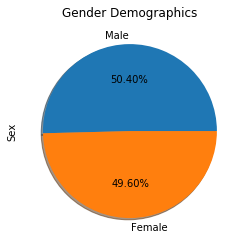

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989']
gender_stats = gender['Sex'].value_counts()
gender_stats.plot(kind='pie', shadow = True, autopct = '%1.2f%%', title='Gender Demographics')

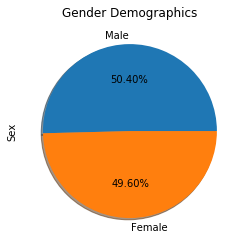

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender['Sex'].unique()
fig1, gender_mice = plt.subplots()
gender_mice = plt.pie(gender_stats, labels=labels, autopct='%1.2f%%', shadow=True, startangle=0)
plt.title('Gender Demographics')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Regimen_tumors = {}
cap_weights = []
cap_avg_vol = []

for regimen in regimens:
    regimen_df = clean_combined_data_df.loc[clean_combined_data_df['Drug Regimen'] == regimen]

    mice_list = regimen_df['Mouse ID'].unique()
    regimen_last_df = pd.DataFrame(columns=regimen_df.columns)
    for mouse in mice_list:
        each_mouse_df = regimen_df.loc[regimen_df['Mouse ID'] == mouse]
        each_mouse_df = each_mouse_df.reset_index(drop=True)
        each_mouse_df = each_mouse_df.sort_values(by='Timepoint')
        each_mouse_df
        if regimen == 'Capomulin':
            cap_weights.append(each_mouse_df['Weight (g)'].mean())
            cap_avg_vol.append(each_mouse_df['Tumor Volume (mm3)'].mean())
        last_mouse_df = each_mouse_df.tail(1)
        regimen_last_df = regimen_last_df.append(last_mouse_df, ignore_index=True)
    
    # Start by getting the last (greatest) timepoint for each mouse
    Regimen_tumors.update({f"{regimen}_Volumes":regimen_last_df['Tumor Volume (mm3)']})
# Regimen_tumors

In [13]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimens:
    IQR = Regimen_tumors[regimen+'_Volumes'].describe()['75%'] - Regimen_tumors[regimen+'_Volumes'].describe()['25%']
    print(f'{regimen}:')
    print(f'   IQR = {IQR}')
    outliers = []
    # Determine outliers using upper and lower bounds
    lower = Regimen_tumors[regimen+'_Volumes'].describe()['25%'] - 1.5*IQR
    print(f'   lower = {lower}')
    upper = Regimen_tumors[regimen+'_Volumes'].describe()['75%'] + 1.5*IQR
    print(f'   upper = {upper}')
    
    for volume in Regimen_tumors[regimen+'_Volumes']:
        if (volume < lower) or (volume > upper):
            outliers.append(volume)
    print(f'   outliers: {outliers}')

Capomulin:
   IQR = 7.781863460000004
   lower = 20.70456164999999
   upper = 51.83201549
   outliers: []
Ramicane:
   IQR = 9.098536719999998
   lower = 17.912664470000003
   upper = 54.30681135
   outliers: []
Infubinol:
   IQR = 11.477135160000003
   lower = 36.83290494999999
   upper = 82.74144559000001
   outliers: [36.321345799999996]
Ceftamin:
   IQR = 15.577752179999997
   lower = 25.355449580000002
   upper = 87.66645829999999
   outliers: []


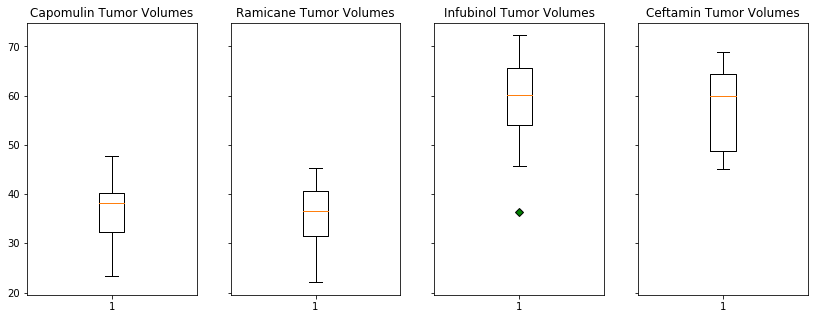

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=[14,5], sharey=True)
ax1.set_title('Capomulin Tumor Volumes')
ax2.set_title('Ramicane Tumor Volumes')
ax3.set_title('Infubinol Tumor Volumes')
ax4.set_title('Ceftamin Tumor Volumes')

ax1.boxplot(Regimen_tumors['Capomulin_Volumes'])
ax2.boxplot(Regimen_tumors['Ramicane_Volumes'])
ax3.boxplot(Regimen_tumors['Infubinol_Volumes'], flierprops=green_diamond)
ax4.boxplot(Regimen_tumors['Ceftamin_Volumes'])
plt.show()

## Line and Scatter Plots

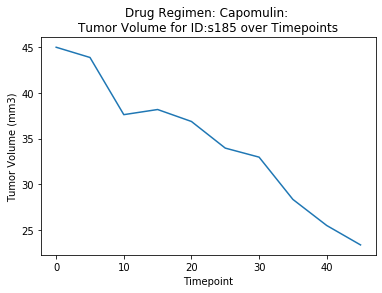

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
chosen_mouse = 's185'
one_cap_mouse_df = clean_combined_data_df.loc[clean_combined_data_df['Mouse ID'] == chosen_mouse]
one_cap_mouse_df
plt.plot(one_cap_mouse_df['Timepoint'], one_cap_mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'''Drug Regimen: Capomulin: 
Tumor Volume for ID:{chosen_mouse} over Timepoints''')
plt.show()

### User Request Mouse Line Chart (Extra Stuff: just for fun)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Which Drug Regimen would you like to see? Ramicane
['k403' 'g791' 's508' 'm546' 'z578' 'j913' 'n364' 'c758' 'a644' 'i177'
 'j989' 'a520' 'r811' 'i334' 'q610' 'd251' 'c458' 'a411' 'e662' 'u196'
 'q597' 'a444' 'r921' 'w678' 'y449']
Which mouse would you like to see? g791


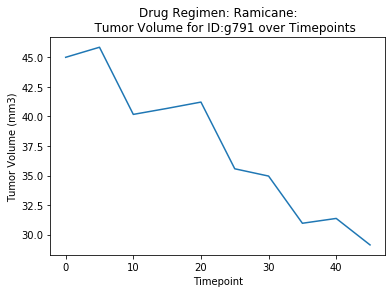

Would you like to see another (y/n)? n


In [16]:
# Extra stuff, just for fun
# Generate a line plot of time point versus tumor volume for a mouse of the users choice
view_mouse = 'y'
while view_mouse == 'y':
    print(clean_combined_data_df['Drug Regimen'].unique())
    chosen_regimen = input("Which Drug Regimen would you like to see? ")
    chosen_regimen_df = clean_combined_data_df.loc[clean_combined_data_df['Drug Regimen'] == chosen_regimen]
    chosen_mice_list = chosen_regimen_df['Mouse ID'].unique()
    print(chosen_mice_list)
    chosen_mouse = input("Which mouse would you like to see? ")

    one_cap_mouse_df = clean_combined_data_df.loc[clean_combined_data_df['Mouse ID'] == chosen_mouse]
    one_cap_mouse_df
    plt.plot(one_cap_mouse_df['Timepoint'], one_cap_mouse_df['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(f'''Drug Regimen: {chosen_regimen}:
    Tumor Volume for ID:{chosen_mouse} over Timepoints''')
    plt.show()
    
    view_mouse = input("Would you like to see another (y/n)? ")

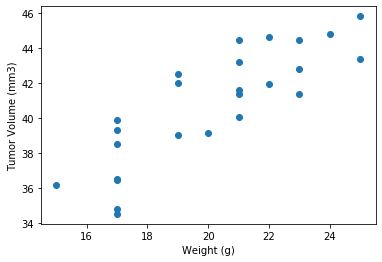

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_values = cap_weights
y_values = cap_avg_vol
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
regress_values = []
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
for x in x_values:
    regress_values.append(x * slope + intercept)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

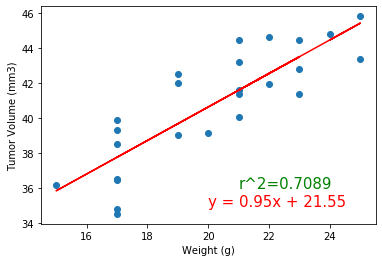

In [19]:
x_values = cap_weights
y_values = cap_avg_vol
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_values, regress_values, color='r')
plt.annotate(line_eq,(20,35), fontsize=15,color='r')
plt.annotate(f'r^2={round(rvalue**2,4)}',(21,36),fontsize=15,color='g')
plt.show()